# ATTACK SELFISH MINING

#### 1) Importation des librairies et creation de fonction 

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def AouB(proba):
    Block=np.random.choice(('A','B'),p=[proba,1-proba])
    return Block


def Simulation(progression,proba,A_Retard,Z_Avance):
    R=0 # Reward
    Ha=0 # nombre de block Attaquant
    Hb=0 # nombre de block du réseau
    while ((progression != 0-A_Retard) and (progression != Z_Avance)):
        Tentative=AouB(proba)
        if Tentative =='A':
            R+=1
            Ha+=1
            progression+=1
        else:
            progression-=1
            Hb+=1
    if progression == Z_Avance:
        return R,Ha,Ha
    else:
        return 0,Hb,-Hb

def Résultat(nombre=5,progression=1,proba=0.5,A_Retard=3,Z_Avance=2):
    ER=0
    EH=0
    Miner=[]
    for i in range(nombre):
        R,H,M = Simulation(progression,proba,A_Retard,Z_Avance)
        Miner.append(M)
        ER+=R
        EH+=H
    return ER,EH,Miner

def Rendement(ER,EH,proba):
    R_exp=ER/EH
    return R_exp


#### 2) Paramétrage

In [52]:
#Paramètres
nombre=3000 # Nombre de Simulation
progression=1 # avancement départ de l'Attaquant
L_proba=np.arange(0.01,0.51,0.01)
#Values
ER_Z2_A3=[]
EH_Z2_A3=[]
Miner_Z2_A3=[]
ER_Z2_A5=[]
EH_Z2_A5=[]
Miner_Z2_A5=[]
ER_Z2_A10=[]
EH_Z2_A10=[]
Miner_Z2_A10=[]
#Rendement
L_Rdt_Exp_Z2_A3=[]
L_Rdt_Exp_Z2_A5=[]
L_Rdt_Exp_Z2_A10=[]

for i in L_proba:
    er_Z2_A3,eh_Z2_A3,M_Z2_A3 = Résultat(nombre,progression,i,3,2)
    ER_Z2_A3.append(er_Z2_A3)
    EH_Z2_A3.append(eh_Z2_A3)
    Miner_Z2_A3.append(M_Z2_A3)
    R_Exp_Z2_A3 = Rendement(er_Z2_A3,eh_Z2_A3,i)
    L_Rdt_Exp_Z2_A3.append(R_Exp_Z2_A3)
    
    er_Z2_A5,eh_Z2_A5,M_Z2_A5 = Résultat(nombre,progression,i,5,2)
    ER_Z2_A5.append(er_Z2_A5)
    EH_Z2_A5.append(eh_Z2_A5)
    Miner_Z2_A5.append(M_Z2_A5)
    R_Exp_Z2_A5 = Rendement(er_Z2_A5,eh_Z2_A5,i)
    L_Rdt_Exp_Z2_A5.append(R_Exp_Z2_A5)
    
    er_Z2_A10,eh_Z2_A10,M_Z2_A10 = Résultat(nombre,progression,i,10,2)
    ER_Z2_A10.append(er_Z2_A10)
    EH_Z2_A10.append(eh_Z2_A10)
    Miner_Z2_A10.append(M_Z2_A10)
    R_Exp_Z2_A10 = Rendement(er_Z2_A10,eh_Z2_A10,i)
    L_Rdt_Exp_Z2_A10.append(R_Exp_Z2_A10)

#### 3) Seuil de Rentabilité

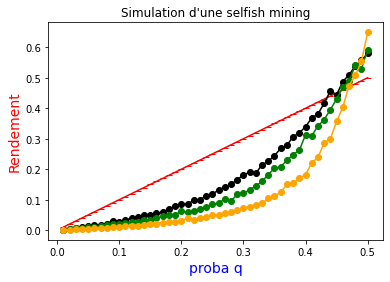

In [53]:
fig,ax=plt.subplots()
plt.title('Simulation d\'une selfish mining')
ax.plot(L_proba,L_proba,marker="_",color='red')
ax.plot(L_proba,L_Rdt_Exp_Z2_A3,marker="o",color='black')
ax.plot(L_proba,L_Rdt_Exp_Z2_A5,marker="o",color='green')
ax.plot(L_proba,L_Rdt_Exp_Z2_A10,marker="o",color='orange')

ax.set_xlabel("proba q",color="blue",fontsize=14)
ax.set_ylabel("Rendement",color="red",fontsize=14)
idx_R_Exp_Z2_A3 = np.argwhere(np.diff(np.sign(L_proba - L_Rdt_Exp_Z2_A3))).flatten() #index intersection Z=2 A=3 
idx_R_Exp_Z2_A5 = np.argwhere(np.diff(np.sign(L_proba - L_Rdt_Exp_Z2_A5))).flatten() #index intersection Z=2 A=5 
idx_R_Exp_Z2_A10 = np.argwhere(np.diff(np.sign(L_proba - L_Rdt_Exp_Z2_A10))).flatten() #index intersection Z=2 A=10 

plt.show()

In [54]:
print("Valeur min de Rdt Z=2 A=3 => ",L_proba[idx_R_Exp_Z2_A3[0]])
print("Valeur min de Rdt Z=2 A=5 => ",L_proba[idx_R_Exp_Z2_A5[0]])
print("Valeur min de Rdt Z=2 A=10 => ",L_proba[idx_R_Exp_Z2_A10[0]])

Valeur min de Rdt Z=2 A=3 =>  0.43
Valeur min de Rdt Z=2 A=5 =>  0.45
Valeur min de Rdt Z=2 A=10 =>  0.46


#### 4) Avantage

In [55]:
def BlockTeam(M):
    TeamA=0
    TeamB=0
    for i in M:
        if i>0:
            TeamA+=i
        else:
            TeamB+=abs(i)
    return TeamA,TeamB

In [58]:
TeamA_Z2_A3=[]
TeamB_Z2_A3=[]
TeamA_Z2_A5=[]
TeamB_Z2_A5=[]
TeamA_Z2_A10=[]
TeamB_Z2_A10=[]
for index in range(len(Miner_Z2_A3)):
    TA_Z2_A3,TB_Z2_A3 = BlockTeam(Miner_Z2_A3[index])
    TeamA_Z2_A3.append(TA_Z2_A3)
    TeamB_Z2_A3.append(TB_Z2_A3)
    TA_Z2_A5,TB_Z2_A5 = BlockTeam(Miner_Z2_A5[index])
    TeamA_Z2_A5.append(TA_Z2_A5)
    TeamB_Z2_A5.append(TB_Z2_A5)
    TA_Z2_A10,TB_Z2_A10 = BlockTeam(Miner_Z2_A10[index])
    TeamA_Z2_A10.append(TA_Z2_A10)
    TeamB_Z2_A10.append(TB_Z2_A10)

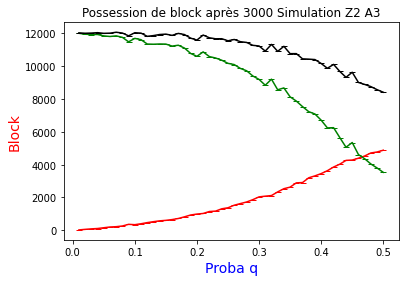

In [59]:
fig,ax=plt.subplots()
plt.title('Possession de block après '+str(nombre)+' Simulation Z2 A3')
ax.plot(L_proba,TeamA_Z2_A3,marker="_",color='red')
ax.plot(L_proba,TeamB_Z2_A3,marker="_",color='green')
ax.plot(L_proba,EH_Z2_A3,marker="_",color='black')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Block",color="red",fontsize=14)
plt.show()

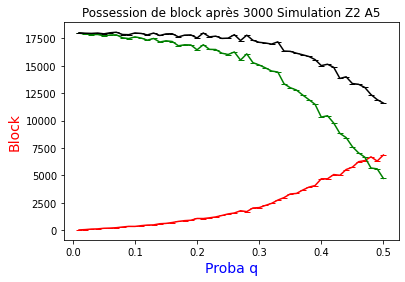

In [60]:
fig,ax=plt.subplots()
plt.title('Possession de block après '+str(nombre)+' Simulation Z2 A5')
ax.plot(L_proba,TeamA_Z2_A5,marker="_",color='red')
ax.plot(L_proba,TeamB_Z2_A5,marker="_",color='green')
ax.plot(L_proba,EH_Z2_A5,marker="_",color='black')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Block",color="red",fontsize=14)
plt.show()

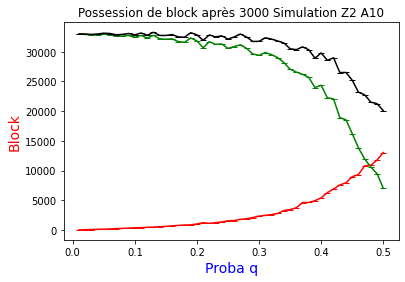

In [61]:
fig,ax=plt.subplots()
plt.title('Possession de block après '+str(nombre)+' Simulation Z2 A10')
ax.plot(L_proba,TeamA_Z2_A10,marker="_",color='red')
ax.plot(L_proba,TeamB_Z2_A10,marker="_",color='green')
ax.plot(L_proba,EH_Z2_A10,marker="_",color='black')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Block",color="red",fontsize=14)
plt.show()

In [62]:
RatioBlockA_Z2_A3=[]
RatioBlockB_Z2_A3=[]
for index in range(len(EH_Z2_A3)):
    RatioBlockA_Z2_A3.append(TeamA_Z2_A3[index]/EH_Z2_A3[index])
    RatioBlockB_Z2_A3.append(TeamB_Z2_A3[index]/EH_Z2_A3[index])

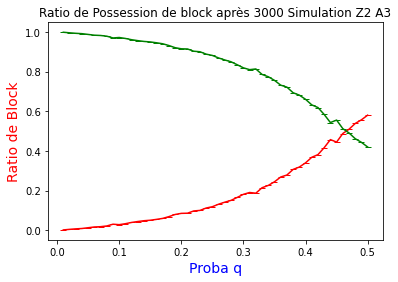

In [63]:
fig,ax=plt.subplots()
plt.title('Ratio de Possession de block après '+str(nombre)+' Simulation Z2 A3')
ax.plot(L_proba,RatioBlockA_Z2_A3,marker="_",color='red')
ax.plot(L_proba,RatioBlockB_Z2_A3,marker="_",color='green')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Block",color="red",fontsize=14)

plt.show()

In [64]:
RatioBlockA_Z2_A5=[]
RatioBlockB_Z2_A5=[]
for index in range(len(EH_Z2_A5)):
    RatioBlockA_Z2_A5.append(TeamA_Z2_A5[index]/EH_Z2_A5[index])
    RatioBlockB_Z2_A5.append(TeamB_Z2_A5[index]/EH_Z2_A5[index])

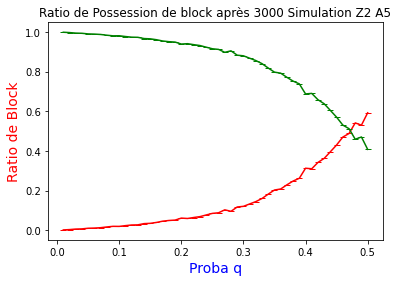

In [65]:
fig,ax=plt.subplots()
plt.title('Ratio de Possession de block après '+str(nombre)+' Simulation Z2 A5')
ax.plot(L_proba,RatioBlockA_Z2_A5,marker="_",color='red')
ax.plot(L_proba,RatioBlockB_Z2_A5,marker="_",color='green')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Block",color="red",fontsize=14)

plt.show()

In [66]:
RatioBlockA_Z2_A10=[]
RatioBlockB_Z2_A10=[]
for index in range(len(EH_Z2_A10)):
    RatioBlockA_Z2_A10.append(TeamA_Z2_A10[index]/EH_Z2_A10[index])
    RatioBlockB_Z2_A10.append(TeamB_Z2_A10[index]/EH_Z2_A10[index])

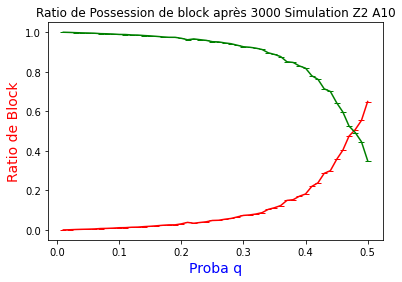

In [67]:
fig,ax=plt.subplots()
plt.title('Ratio de Possession de block après '+str(nombre)+' Simulation Z2 A10')
ax.plot(L_proba,RatioBlockA_Z2_A10,marker="_",color='red')
ax.plot(L_proba,RatioBlockB_Z2_A10,marker="_",color='green')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Block",color="red",fontsize=14)

plt.show()

In [68]:
RewardParSimulationA_Z2_A3=[]
for index in range(len(ER_Z2_A3)):
    RewardParSimulationA_Z2_A3.append(ER_Z2_A3[index]/nombre)

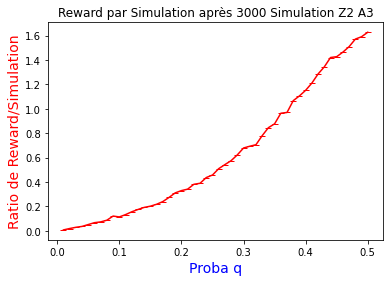

In [69]:
fig,ax=plt.subplots()
plt.title('Reward par Simulation après '+str(nombre)+' Simulation Z2 A3')
ax.plot(L_proba,RewardParSimulationA_Z2_A3,marker="_",color='red')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Reward/Simulation",color="red",fontsize=14)

plt.show()

In [70]:
RewardParSimulationA_Z2_A5=[]
for index in range(len(ER_Z2_A5)):
    RewardParSimulationA_Z2_A5.append(ER_Z2_A5[index]/nombre)

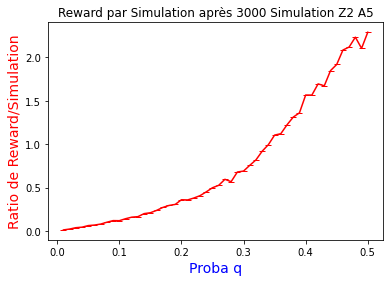

In [71]:
fig,ax=plt.subplots()
plt.title('Reward par Simulation après '+str(nombre)+' Simulation Z2 A5')
ax.plot(L_proba,RewardParSimulationA_Z2_A5,marker="_",color='red')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Reward/Simulation",color="red",fontsize=14)

plt.show()

In [72]:
RewardParSimulationA_Z2_A10=[]
for index in range(len(ER_Z2_A10)):
    RewardParSimulationA_Z2_A10.append(ER_Z2_A10[index]/nombre)

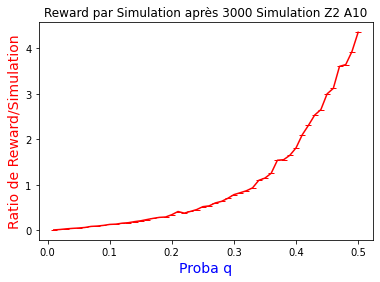

In [73]:
fig,ax=plt.subplots()
plt.title('Reward par Simulation après '+str(nombre)+' Simulation Z2 A10')
ax.plot(L_proba,RewardParSimulationA_Z2_A10,marker="_",color='red')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Reward/Simulation",color="red",fontsize=14)

plt.show()